In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import confusion_matrix
from pickle import dump
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [2]:
dataset = pd.read_csv('data.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values


In [23]:
print (dataset)

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)


In [4]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [5]:
classifier = LogisticRegression(random_state = 10)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=10)

In [6]:
y_pred = classifier.predict(X_test)

In [7]:

test_acc = accuracy_score(y_test, y_pred)
print("The Accuracy for Test Set is {}".format(test_acc*100))


The Accuracy for Test Set is 90.0


Text(0.5, 36.72222222222221, 'Predicted Values')

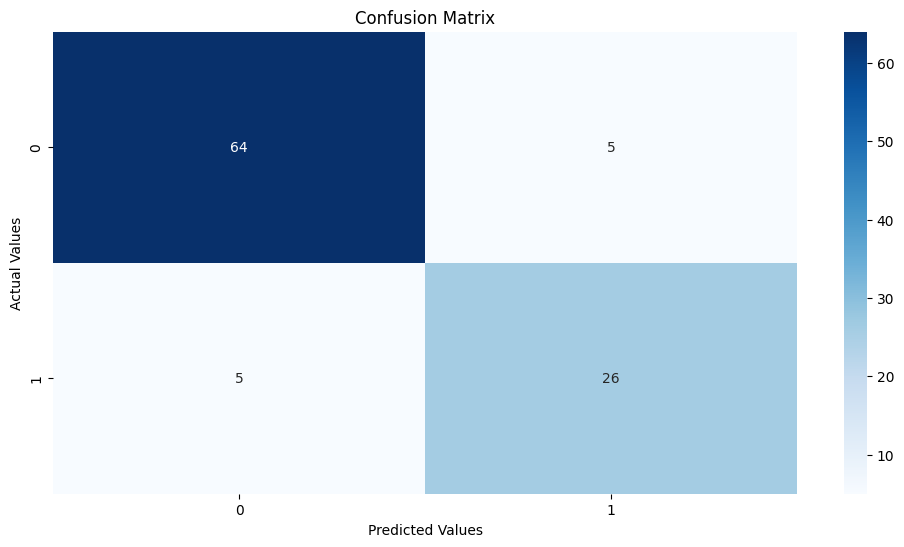

In [8]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")

In [9]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        69
           1       0.84      0.84      0.84        31

    accuracy                           0.90       100
   macro avg       0.88      0.88      0.88       100
weighted avg       0.90      0.90      0.90       100



In [17]:
#Test prediction
user_age_salary=[[20,900000]]
scaled_result = sc.transform(user_age_salary)
res=classifier.predict(scaled_result)
if res==1:
    print("He can buy the car")
else:
    print("He can't buy the car")

He can buy the car


In [22]:
print (res)

[1]


In [11]:
dump(classifier, open('model.pkl', 'wb'))
# save the scaler
dump(sc, open('scaler.pkl', 'wb'))

In [25]:
import pickle

In [26]:
pickle.dump(sc,open('regmodel.pkl','wb'))

In [29]:
 
#pickled_model = pickle.load(open('scaler.pkl','rb'))

In [30]:
#pickled_model.

In [31]:
#pickle.dump(regression,open('regmodel.pkl','wb'))

In [32]:
#pickled_model.